# Problem Statement 

Optimize the Loan eligibility process
Predict Loan Eligibility for Dream Housing Finance company
Dream Housing Finance company deals in all kinds of home loans. They have presence across all urban, semi urban and rural areas. Customer first applies for home loan and after that company validates the customer eligibility for loan.

Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have provided a dataset to identify the customers segments that are eligible for loan amount so that they can specifically target these customers. 

## Data Dictionary

### Train file: CSVcontaining the customers for whom loan eligibility is known as 'Loan_Status'

- Variable	Description
- Loan_ID	Unique Loan ID
- Gender	Male/ Female
- Married	Applicant married (Y/N)
- Dependents	Number of dependents
- Education	Applicant Education (Graduate/ Under Graduate)
- Self_Employed	Self employed (Y/N)
- ApplicantIncome	Applicant income
- CoapplicantIncome	Coapplicant income
- LoanAmount	Loan amount in thousands
- Loan_Amount_Term	Term of loan in months
- Credit_History	credit history meets guidelines
- Property_Area	Urban/ Semi Urban/ Rural
- Loan_Status	(Target) Loan approved (Y/N)


### Submission file format

 

- Variable	Description
- Loan_ID	Unique Loan ID
- Loan_Status	(Target) Loan approved (Y/N)



### Evaluation Metric
Your model performance will be evaluated on the basis of your prediction of loan status for the test data (test.csv), which contains similar data-points as train except for the loan status to be predicted. Your submission needs to be in the format as shown in sample submission.

We at our end, have the actual loan status for the test dataset, against which your predictions will be evaluated. We will use the Accuracy value to judge your response.


### Public and Private Split
Test file is further divided into Public (25%) and Private (75%)

- Your initial responses will be checked and scored on the Public data.
- The final rankings would be based on your private score which will be published once the competition is over.

### Guidelines for Final Submission
Please ensure that your final submission includes the following:

 
Solution file containing the predicted sales value in the test dataset (format is given in sample submission csv)
Code file for reproducing the submission, note that it is mandatory to submit your code for a valid final submission

# Importing Libraries

In [196]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Loading Dataset

In [197]:
# Importing training and testing datasets

df_train = pd.read_csv("C:\\Users\\kiran\\OneDrive\\Desktop\\Data Analyst\\Analytics Vidhya Loan Prediction Hackathon\\train_ctrUa4K.csv")
df_test = pd.read_csv("C:\\Users\\kiran\\OneDrive\\Desktop\\Data Analyst\\Analytics Vidhya Loan Prediction Hackathon\\test_lAUu6dG.csv")

In [198]:
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# Inspecting Dataset

In [199]:
df_train.shape

(614, 13)

In [200]:
df_test.shape

(367, 12)

In [201]:
df_train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [202]:
df_test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [203]:
df_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [204]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


# Checking for Duplicates

In [205]:
df_train.duplicated().sum()

0

In [206]:
# Zero duplicates found in rows training dataset

In [207]:
df_test.duplicated().sum()

0

In [208]:
# Zero duplicates found in rows in testing dataset

# Checking Missing Values

In [209]:
df_train.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [210]:
df_test.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

# Handling Missing Values 

In [211]:
# Splitting into numerical and categorical columns

num_df = df_train.select_dtypes(include=['number'])
cat_df = df_train.select_dtypes(include = ['object'])

num_df_test = df_test.select_dtypes(include=['number'])
cat_df_test = df_test.select_dtypes(include = ['object'])

In [212]:
num_columns = num_df.columns.tolist()
cat_columns = cat_df.columns.tolist()
print("Numerical columns:",num_columns)
print("Categorical columns:",cat_columns)

num_columns_test = num_df_test.columns.tolist()
cat_columns_test = cat_df_test.columns.tolist()
print("Numerical columns of test data:",num_columns_test)
print("Categorical columns of test data:",cat_columns_test)

Numerical columns: ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
Categorical columns: ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']
Numerical columns of test data: ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
Categorical columns of test data: ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']


In [213]:
# Checking Correlation of Numerical Columns

## Checking Correlation of Numerical Columns

<Axes: >

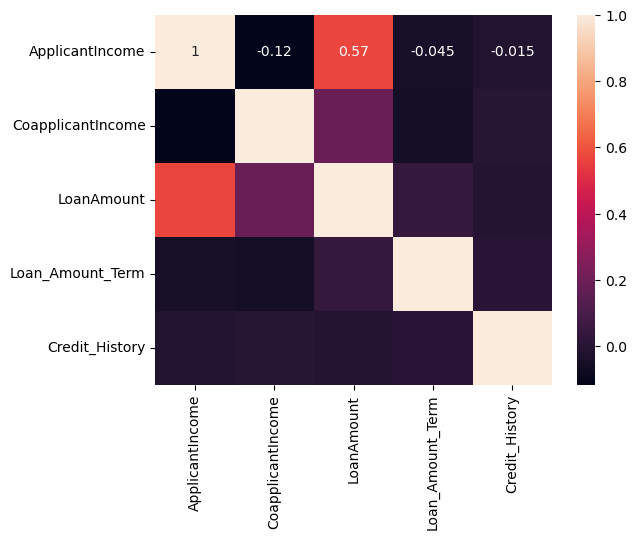

In [214]:
sns.heatmap(num_df.corr(),annot= True)

In [215]:
# Handling Missing Values in numerical columns

In [216]:
# Checking Histogram for data imputation

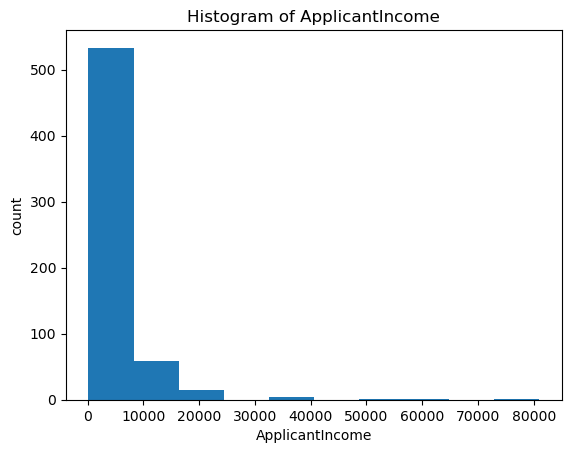

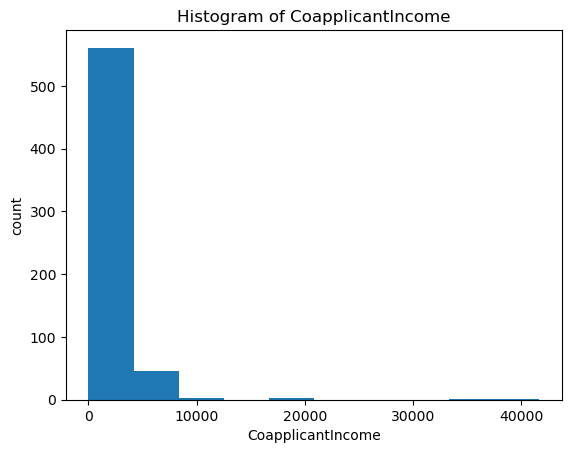

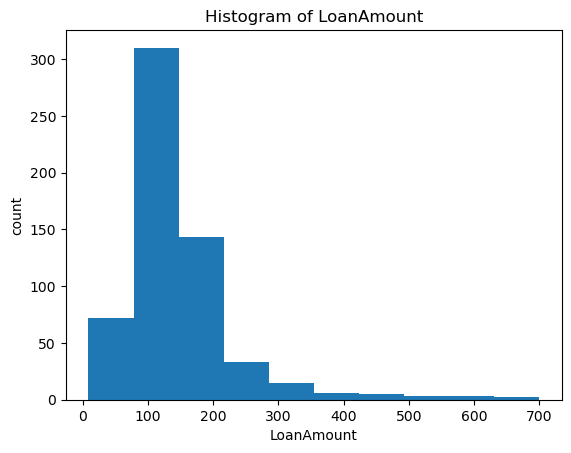

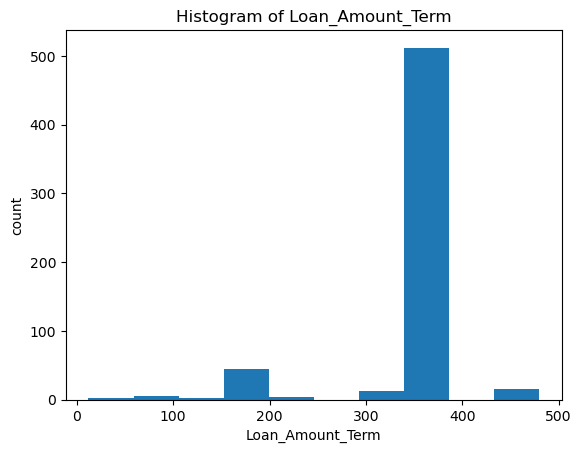

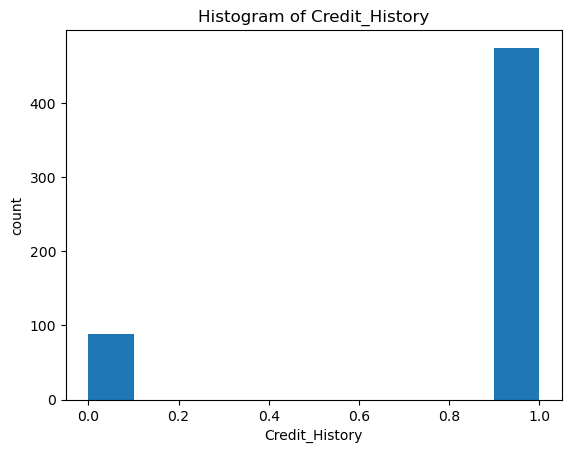

In [217]:
for col in num_columns:
    plt.hist(num_df[col])
    plt.xlabel(col)
    plt.ylabel('count')
    plt.title('Histogram of {}'.format(col))
    plt.show()

In [218]:
# The data is right skewed. So lets impute the data using median values for numerical columns in both test and train datasets.

In [219]:
# Filling missing values in numerical columns of train data
for col in num_columns:
  num_df[col] = num_df[col].fillna(num_df[col].median())

# Filling missing values in numerical columns of test data
for col in num_columns_test:
  num_df_test[col] = num_df_test[col].fillna(num_df_test[col].median())    

In [220]:
# Checking missing values again in num_df
num_df.isna().sum()

ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
dtype: int64

In [221]:
# Checking missing values again in num_df_test
num_df_test.isna().sum()

ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
dtype: int64

In [222]:
# Handling Missing Values in categorical columns in train data
for col in cat_columns:
    cat_df[col] = cat_df[col].fillna(cat_df[col].mode()[0])

# Handling Missing Values in categorical columns in test data
for col in cat_columns_test:
    cat_df_test[col] = cat_df_test[col].fillna(cat_df_test[col].mode()[0])

In [223]:
# Checking missing values again in cat_df
cat_df.isna().sum()

Loan_ID          0
Gender           0
Married          0
Dependents       0
Education        0
Self_Employed    0
Property_Area    0
Loan_Status      0
dtype: int64

In [224]:
# Checking missing values again in cat_df_test
cat_df_test.isna().sum()

Loan_ID          0
Gender           0
Married          0
Dependents       0
Education        0
Self_Employed    0
Property_Area    0
dtype: int64

In [225]:
# Recombine both numerical and categorical columns
df_train = pd.concat([cat_df,num_df],axis=1)
df_test = pd.concat([cat_df_test,num_df_test],axis=1)


In [226]:
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,LP001002,Male,No,0,Graduate,No,Urban,Y,5849,0.0,128.0,360.0,1.0
1,LP001003,Male,Yes,1,Graduate,No,Rural,N,4583,1508.0,128.0,360.0,1.0
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y,3000,0.0,66.0,360.0,1.0
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y,2583,2358.0,120.0,360.0,1.0
4,LP001008,Male,No,0,Graduate,No,Urban,Y,6000,0.0,141.0,360.0,1.0


In [227]:
df_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,LP001015,Male,Yes,0,Graduate,No,Urban,5720,0,110.0,360.0,1.0
1,LP001022,Male,Yes,1,Graduate,No,Urban,3076,1500,126.0,360.0,1.0
2,LP001031,Male,Yes,2,Graduate,No,Urban,5000,1800,208.0,360.0,1.0
3,LP001035,Male,Yes,2,Graduate,No,Urban,2340,2546,100.0,360.0,1.0
4,LP001051,Male,No,0,Not Graduate,No,Urban,3276,0,78.0,360.0,1.0


In [228]:
# Removing the "+" string from Dependents column to make it into a numerical column
df_train['Dependents'] = df_train['Dependents'].str.replace('+', '')

In [229]:
# Removing the "+" string from Dependents column to make it into a numerical column
df_test['Dependents'] = df_test['Dependents'].str.replace('+', '')

In [230]:
df_train['Dependents'] = df_train['Dependents'].astype(float)
df_test['Dependents'] = df_test['Dependents'].astype(float)

# Outlier Handling

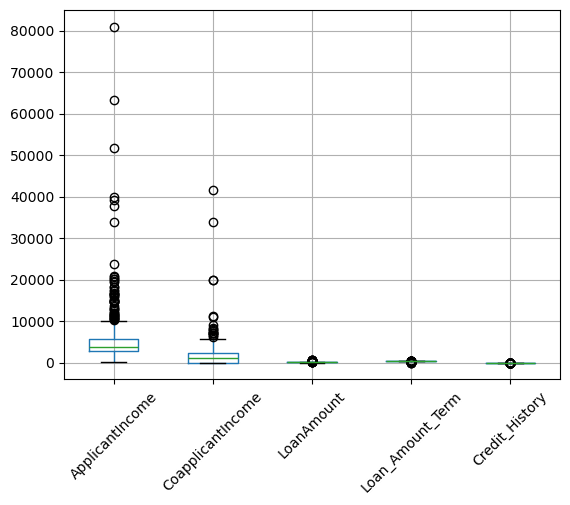

In [231]:
num_df.boxplot()
plt.xticks(rotation=45)
plt.show()

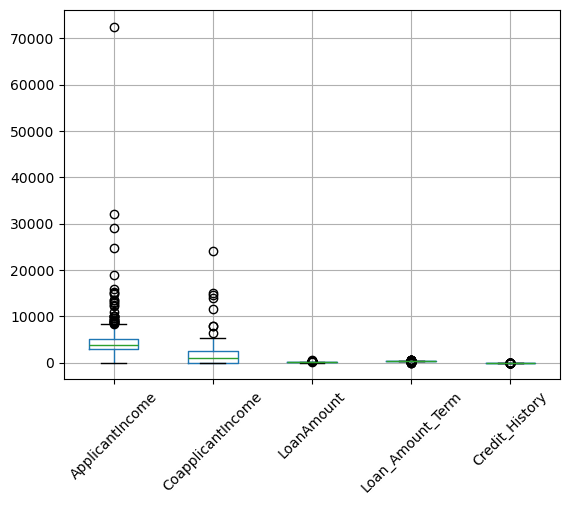

In [232]:
num_df_test.boxplot()
plt.xticks(rotation=45)
plt.show()

In [233]:
def remove_outliers(df, column_name):
    q1 = df[column_name].quantile(0.25)
    q3 = df[column_name].quantile(0.75)
    iqr = q3 - q1
    upper_bound = q3 + 1.5 * iqr
    lower_bound = q1 - 1.5 * iqr
    df[column_name] = df[column_name].clip(upper=upper_bound)
    df[column_name] = df[column_name].clip(lower=lower_bound)
    return df[column_name]

In [234]:
for col in num_columns:
  num_df[col] = remove_outliers(num_df, col)

In [235]:
for col in num_columns_test:
  num_df_test[col] = remove_outliers(num_df_test, col)

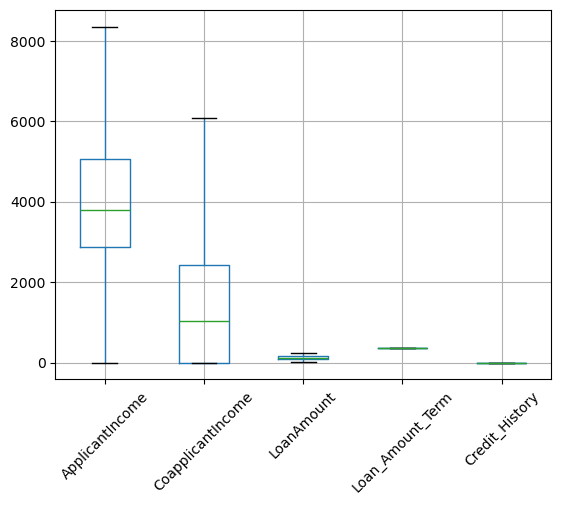

In [236]:
num_df_test.boxplot()
plt.xticks(rotation=45)
plt.show()

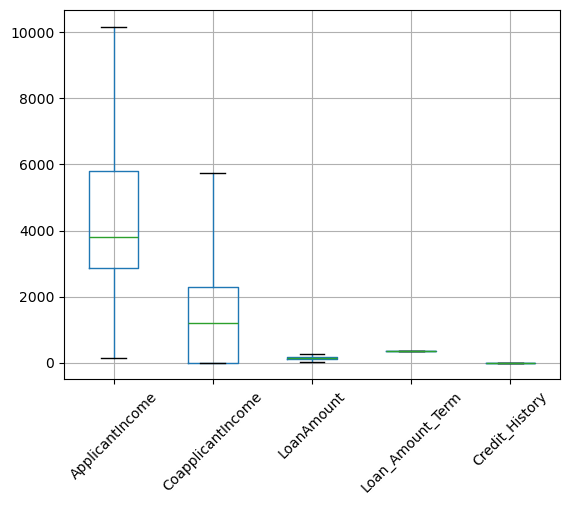

In [237]:
num_df.boxplot()
plt.xticks(rotation=45)
plt.show()

# Checking Data Imbalance 

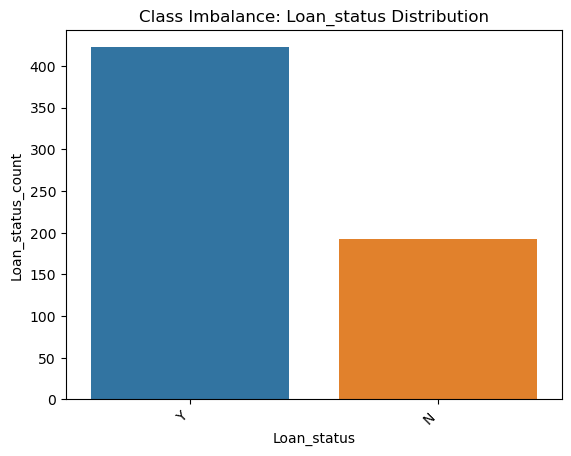

In [238]:
# Plot class imbalance
sns.countplot(x='Loan_Status', data=df_train)
plt.title('Class Imbalance: Loan_status Distribution')
plt.xlabel('Loan_status')
plt.ylabel('Loan_status_count')
plt.xticks(rotation=45, ha='right')
plt.show()

# Feature Encoding

In [239]:
# One hot encoding for columns in training dataset
df_train = pd.get_dummies(df_train,columns=['Gender','Married','Education','Self_Employed','Property_Area'],dtype= int,drop_first=True)
df_train

,Loan_ID,Dependents,Loan_Status,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,LP001002,0.0,Y,5849,0.0,128.0,360.0,1.0,1,0,0,0,0,1
1,LP001003,1.0,N,4583,1508.0,128.0,360.0,1.0,1,1,0,0,0,0
2,LP001005,0.0,Y,3000,0.0,66.0,360.0,1.0,1,1,0,1,0,1
3,LP001006,0.0,Y,2583,2358.0,120.0,360.0,1.0,1,1,1,0,0,1
4,LP001008,0.0,Y,6000,0.0,141.0,360.0,1.0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0.0,Y,2900,0.0,71.0,360.0,1.0,0,0,0,0,0,0
610,LP002979,3.0,Y,4106,0.0,40.0,180.0,1.0,1,1,0,0,0,0
611,LP002983,1.0,Y,8072,240.0,253.0,360.0,1.0,1,1,0,0,0,1
612,LP002984,2.0,Y,7583,0.0,187.0,360.0,1.0,1,1,0,0,0,1


In [240]:
# One hot encoding for columns in testing dataset
df_test = pd.get_dummies(df_test,columns=['Gender','Married','Education','Self_Employed','Property_Area'],dtype= int,drop_first=True)
df_test

,Loan_ID,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,LP001015,0.0,5720,0,110.0,360.0,1.0,1,1,0,0,0,1
1,LP001022,1.0,3076,1500,126.0,360.0,1.0,1,1,0,0,0,1
2,LP001031,2.0,5000,1800,208.0,360.0,1.0,1,1,0,0,0,1
3,LP001035,2.0,2340,2546,100.0,360.0,1.0,1,1,0,0,0,1
4,LP001051,0.0,3276,0,78.0,360.0,1.0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,3.0,4009,1777,113.0,360.0,1.0,1,1,1,1,0,1
363,LP002975,0.0,4158,709,115.0,360.0,1.0,1,1,0,0,0,1
364,LP002980,0.0,3250,1993,126.0,360.0,1.0,1,0,0,0,1,0
365,LP002986,0.0,5000,2393,158.0,360.0,1.0,1,1,0,0,0,0


In [241]:
Loan_ID =  pd.DataFrame(df_test['Loan_ID'])

,Loan_ID
0,LP001015
1,LP001022
2,LP001031
3,LP001035
4,LP001051
...,...
362,LP002971
363,LP002975
364,LP002980
365,LP002986


In [242]:
df_train = df_train.drop('Loan_ID',axis = 1)

df_test = df_test.drop('Loan_ID',axis = 1)

# Feature Scaling

In [243]:
# min max scaling for faetures having non-gaussian distribution in training dataset
min_scaler = MinMaxScaler()
numerical_colms1 = ['Dependents','Loan_Amount_Term']
df_train[numerical_colms1] = min_scaler.fit_transform(df_train[numerical_colms1])
df_train


,Dependents,Loan_Status,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,0.000000,Y,5849,0.0,128.0,0.743590,1.0,1,0,0,0,0,1
1,0.333333,N,4583,1508.0,128.0,0.743590,1.0,1,1,0,0,0,0
2,0.000000,Y,3000,0.0,66.0,0.743590,1.0,1,1,0,1,0,1
3,0.000000,Y,2583,2358.0,120.0,0.743590,1.0,1,1,1,0,0,1
4,0.000000,Y,6000,0.0,141.0,0.743590,1.0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.000000,Y,2900,0.0,71.0,0.743590,1.0,0,0,0,0,0,0
610,1.000000,Y,4106,0.0,40.0,0.358974,1.0,1,1,0,0,0,0
611,0.333333,Y,8072,240.0,253.0,0.743590,1.0,1,1,0,0,0,1
612,0.666667,Y,7583,0.0,187.0,0.743590,1.0,1,1,0,0,0,1


In [244]:

# min max scaling for features having non gaussian distribution in testing dataset
min_scaler = MinMaxScaler()
numerical_colms2 = ['Dependents','Loan_Amount_Term']
df_test[numerical_colms2] = min_scaler.fit_transform(df_test[numerical_colms2])
df_test

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,0.000000,5720,0,110.0,0.746835,1.0,1,1,0,0,0,1
1,0.333333,3076,1500,126.0,0.746835,1.0,1,1,0,0,0,1
2,0.666667,5000,1800,208.0,0.746835,1.0,1,1,0,0,0,1
3,0.666667,2340,2546,100.0,0.746835,1.0,1,1,0,0,0,1
4,0.000000,3276,0,78.0,0.746835,1.0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
362,1.000000,4009,1777,113.0,0.746835,1.0,1,1,1,1,0,1
363,0.000000,4158,709,115.0,0.746835,1.0,1,1,0,0,0,1
364,0.000000,3250,1993,126.0,0.746835,1.0,1,0,0,0,1,0
365,0.000000,5000,2393,158.0,0.746835,1.0,1,1,0,0,0,0


In [245]:
# standard scaling for features having gaussian distribution in training dataset
std_scaler = StandardScaler()
numerical_colms3 = ['ApplicantIncome','LoanAmount','CoapplicantIncome']
df_train[numerical_colms3] = std_scaler.fit_transform(df_train[numerical_colms3])
df_train

,Dependents,Loan_Status,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,0.000000,Y,0.072991,-0.554487,-0.211241,0.743590,1.0,1,0,0,0,0,1
1,0.333333,N,-0.134412,-0.038732,-0.211241,0.743590,1.0,1,1,0,0,0,0
2,0.000000,Y,-0.393747,-0.554487,-0.948996,0.743590,1.0,1,1,0,1,0,1
3,0.000000,Y,-0.462062,0.251980,-0.306435,0.743590,1.0,1,1,1,0,0,1
4,0.000000,Y,0.097728,-0.554487,-0.056551,0.743590,1.0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.000000,Y,-0.410130,-0.554487,-0.889500,0.743590,1.0,0,0,0,0,0,0
610,1.000000,Y,-0.212557,-0.554487,-1.258378,0.358974,1.0,1,1,0,0,0,0
611,0.333333,Y,0.437174,-0.472404,1.276168,0.743590,1.0,1,1,0,0,0,1
612,0.666667,Y,0.357064,-0.554487,0.490816,0.743590,1.0,1,1,0,0,0,1


In [246]:
# standard scaling for features having gaussian distribution in testing dataset
std_scaler = StandardScaler()
numerical_colms4 = ['ApplicantIncome','LoanAmount','CoapplicantIncome']
df_test[numerical_colms4] = std_scaler.fit_transform(df_test[numerical_colms4])
df_test

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,0.000000,0.186461,-0.673335,-0.426780,0.746835,1.0,1,1,0,0,0,1
1,0.333333,-0.352692,-0.029848,-0.163953,0.746835,1.0,1,1,0,0,0,1
2,0.666667,0.039641,0.098849,1.183033,0.746835,1.0,1,1,0,0,0,1
3,0.666667,-0.502774,0.418877,-0.591047,0.746835,1.0,1,1,0,0,0,1
4,0.000000,-0.311909,-0.673335,-0.952433,0.746835,1.0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
362,1.000000,-0.162439,0.088982,-0.377500,0.746835,1.0,1,1,1,1,0,1
363,0.000000,-0.132056,-0.369180,-0.344647,0.746835,1.0,1,1,0,0,0,1
364,0.000000,-0.317211,0.181644,-0.163953,0.746835,1.0,1,0,0,0,1,0
365,0.000000,0.039641,0.353241,0.361700,0.746835,1.0,1,1,0,0,0,0


# Model Training

In [247]:
# Seperating Features and labels
X = df_train.drop(['Loan_Status'],axis =1)
y = df_train['Loan_Status']
X_test1 = df_test

In [248]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 46)

## SVC

In [249]:
# Training and prediction on training data
SVC_model = SVC()
SVC_model.fit(X_train,y_train)
y_pred = SVC_model.predict(X_test)

In [250]:
# On training data
print ("accuracy_score:" , accuracy_score(y_pred,y_test))

accuracy_score: 0.8292682926829268


In [251]:
#  prediction on testing data
y_pred1 = SVC_model.predict(X_test1)

In [252]:
result_df = pd.DataFrame(y_pred1)
result_df

,0
0,Y
1,Y
2,Y
3,Y
4,Y
...,...
362,Y
363,Y
364,Y
365,Y


In [253]:
result_df = pd.concat([Loan_ID,result_df],axis = 1)
result_df.rename(columns={0 : 'Loan_Status'}, inplace=True)

In [254]:
result_df

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
...,...,...
362,LP002971,Y
363,LP002975,Y
364,LP002980,Y
365,LP002986,Y


In [255]:
result_df.to_csv("C:\\Users\\kiran\\OneDrive\\Desktop\\Data Analyst\\Analytics Vidhya Loan Prediction Hackathon\\submission.csv")